# Project-3 Red Wine Quality Prediction

## Problem Statement:
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information

Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model. 

In [549]:
# Lets  start with importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.metrics import roc_curve



import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 


import warnings
warnings.filterwarnings('ignore')

# Examine Data

In [550]:
# Import the data as a pandas DataFrame & check 10 data set
data =pd.read_csv("winequality-red.csv") 
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [551]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### About the column 

1.fixed acidity- its shows the amount of fixed acidity in wine 

2.volatile acidity-its shows the amount of olatile acidity in wine

3.citric acid-its shows the amount of citric acid in wine

4.residual sugar-its shows the amount of residual sugar in wine

5.chlorides-its shows the amount of chlorides in wine

6.free sulfur dioxide-its shows the amount of free sulfur dioxide in wine

7.total sulfur dioxide-its shows the amount of total sulfur dioxide in wine

8.density-its shows the amount of density in wine

9.pH-its shows the amount of pH in wine

10.sulphates-its shows the amount of sulphates in wine

11.alcohol-its shows the amount of alcohol in wine

12.quilty - its shows the qulity based on the all feature column (Basically result of wine quality)


## EDA

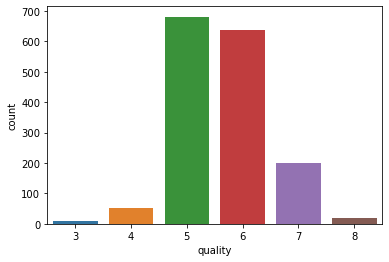

In [552]:
#plot each quality frequency 

sns.countplot(x='quality',data=data)
plt.show()

In [553]:
# Want to know how many quality

data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

## Label Encoding use

In [554]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)

In [555]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [556]:
#Bad becomes 0 and good becomes 1 
data['quality'] = label_quality.fit_transform(data['quality'])

In [557]:
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

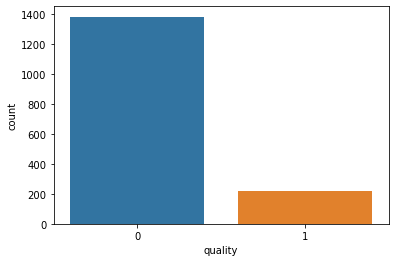

In [558]:
# 0 for bad & 1 for good 
sns.countplot(data['quality'])

In [559]:
X =data.drop(columns=['quality'])
y=data['quality']

In [560]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [561]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


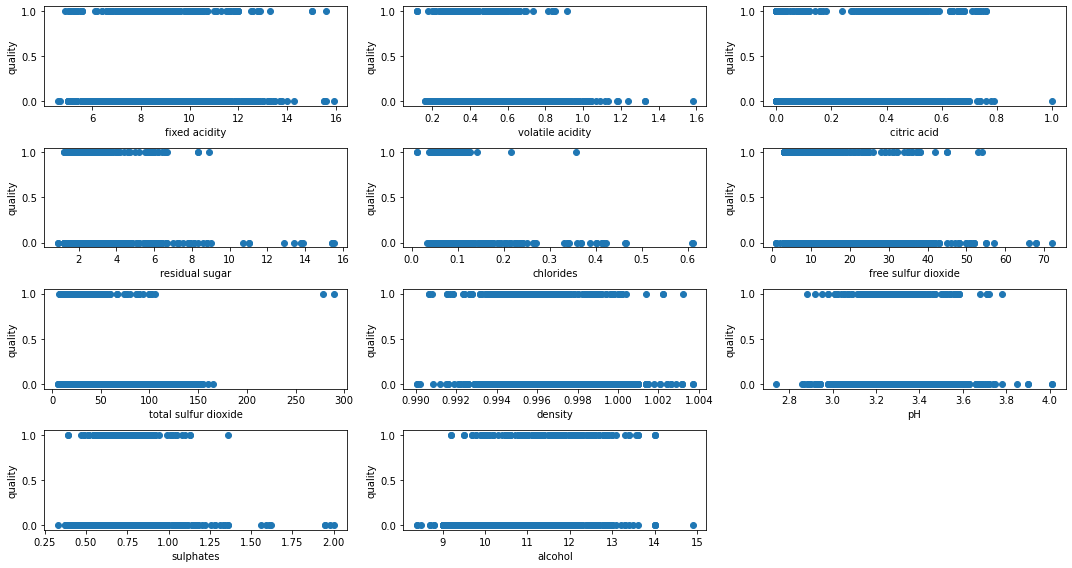

In [562]:
# Visualizing relationship

plt.figure(figsize=(15,8),facecolor='white')
plotnumber=1

for column in X:
    if plotnumber<=12:
        ax= plt.subplot(4,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('quality',fontsize=10)      
        
    plotnumber+=1
plt.tight_layout()

 we can see all the columns equally distributed in the range respective range 

## Correlation- 

checking the problem of multicolinarity in our data set 



In [563]:
# Correlation

data.corr()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.199485


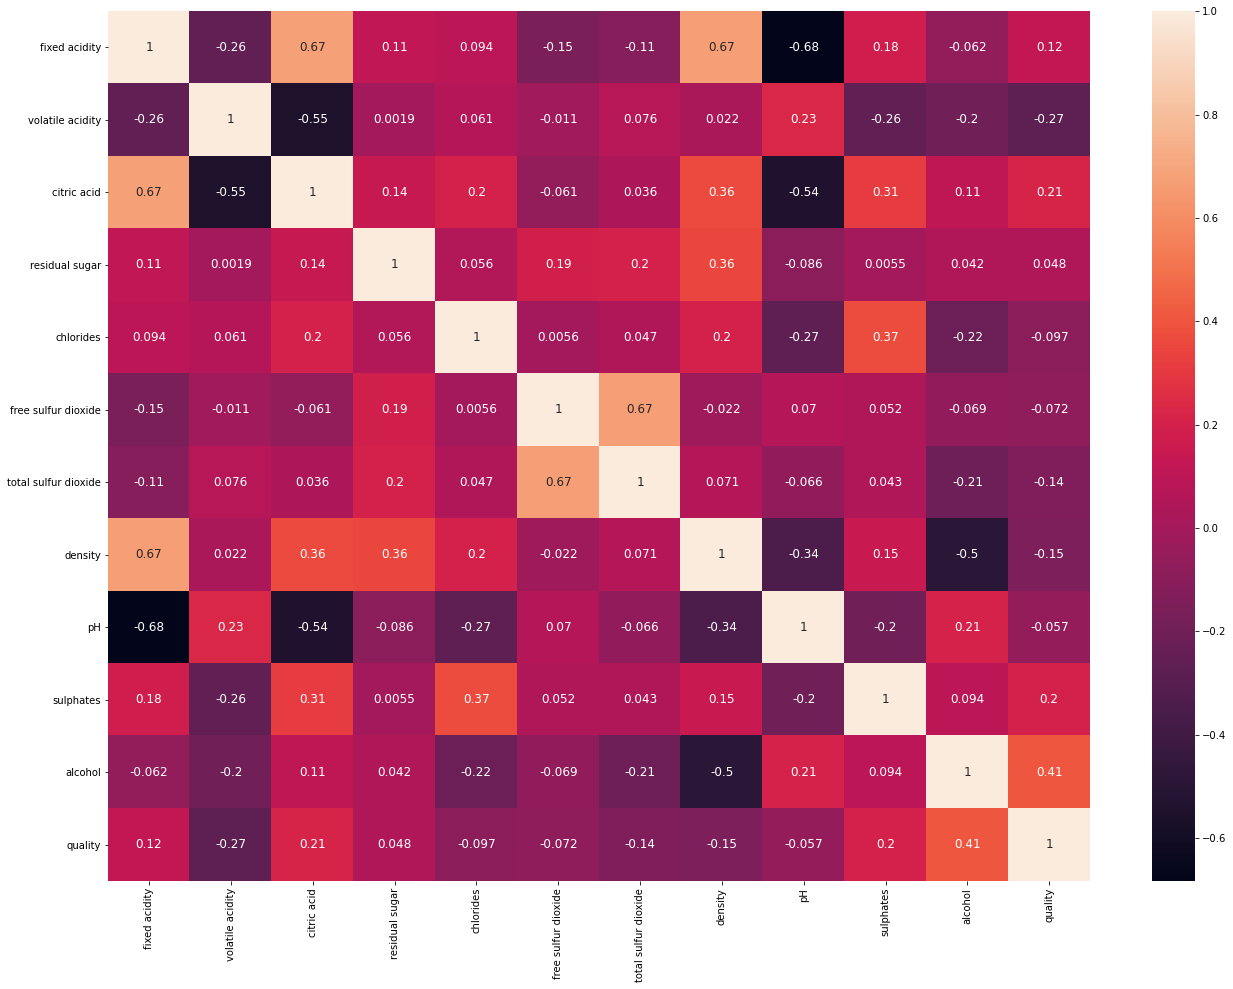

In [564]:
# this code will get the coefficient of one variable vs all other variable (relationship)


plt.figure(figsize=(22,16))
sns.heatmap(data.corr(),annot=True,annot_kws={'size':12}) 
plt.show()


# The value lies between -1 to 1 (-1 Negatively correlation ) & (+1 Positively correlation )

## Outcome of Correlation 

All the columns of the datasets is postively & negatively correlated with the target column

fixed acidity has 12 percent correlation with target column which can be considered as weak bond, volatile acidity
has -27 percent correlation with target column which can be considered as good negative bond,citric acid has 23 percent correlation with target column which can be considered as good bond,residual sugar has 12 percent correlation with target column which can be considered as weak bond,chlorides has -11 percent correlation with target column which can be considered as weak negative bond, free sulfur dioxide has -8.5 percent correlation with target column which can be considered as weak negative bond, total sulfur dioxide has -17 percent correlation with target column which can be considered as good negative bond, density has -15 percent correlation with target column which can be considered as good negative bond,PH has -8 percent correlation with target column which can be considered as good negative bond,sulphates has 31 percent correlation with target column which can be considered as good postive bond, alcohal has 43 percent correlation with target column which can be considered as good postive bond.

Max correlation: alcohal(Positive bond)

Mini correlation: PH (negative bond)






# Describing Datasets:

In [565]:
#dataframe statistics for each colimn in given datset 
#(mean, minimum and maximum value for each column containing numerical data)
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


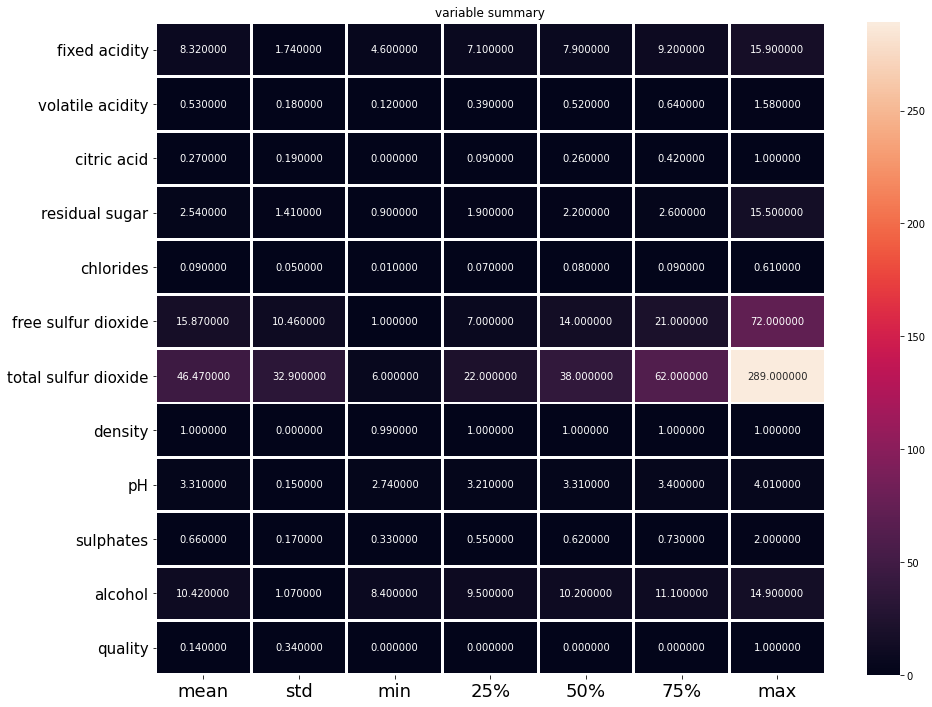

In [566]:
plt.figure(figsize=(15,12))
sns.heatmap(round(data.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f") 
plt.xticks(fontsize=18)
plt.yticks(fontsize=15)
plt.title("variable summary")
plt.show()




## outcome of describe of dataset 

Fromthe shows plotting we are determining mean,standard deviation, minimum and maximum value of each colun it helps us further in data cleaning 

Total Number of rows in the datasets:
     1599 rows
     9 columns

fixed acidity- 
    1.Mean=8.31	
    2.Std=1.74
    3.min_value=4.60
    4.max_value=15.90

volatile acidity-
    1.Mean=0.52
    2.Std=0.17
    3.min_value=0.12
    4.max_value=1.58

citric acid-
    1.Mean=0.27
    2.Std=0.19
    3.min_value=0.00
    4.max_value=1.0

residual sugar-
    1.Mean=2.53
    2.Std=1.40
    3.min_value=0.90
    4.max_value=15.5

chlorides-
    1.Mean=0.08
    2.Std=0.04
    3.min_value=0.01
    4.max_value=0.61

free sulfur dioxide-
    1.Mean=15.87
    2.Std=10.46
    3.min_value=1.00
    4.max_value=7.00

total sulfur dioxide-
    1.Mean=46.46	
    2.Std= 32.89
    3.min_value=6.00
    4.max_value=289.0

density-
    1.Mean=0.99
    2.Std=0.001
    3.min_value=0.99
    4.max_value=1.00

pH-
    1.Mean=3.31
    2.Std=0.15
    3.min_value=2.74
    4.max_value=4.01

sulphates-
    1.Mean=0.65
    2.Std=0.16
    3.min_value=0.33
    4.max_value=2.00
    
alcohol-
    1.Mean=10.42
    2.Std=1.06
    3.min_value=8.40
    4.max_value=14.90



In [567]:
#print summary (number of obseravation and data type for each column in give data set)
print('Shape         ------>',data.shape)
print('Each column and data type and its count','\n')
print(data.info())

Shape         ------> (1599, 12)
Each column and data type and its count 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [568]:
# check null value in our dataset 
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Seems on other cols have nulls. its safe to proced 

# Outlier checking 

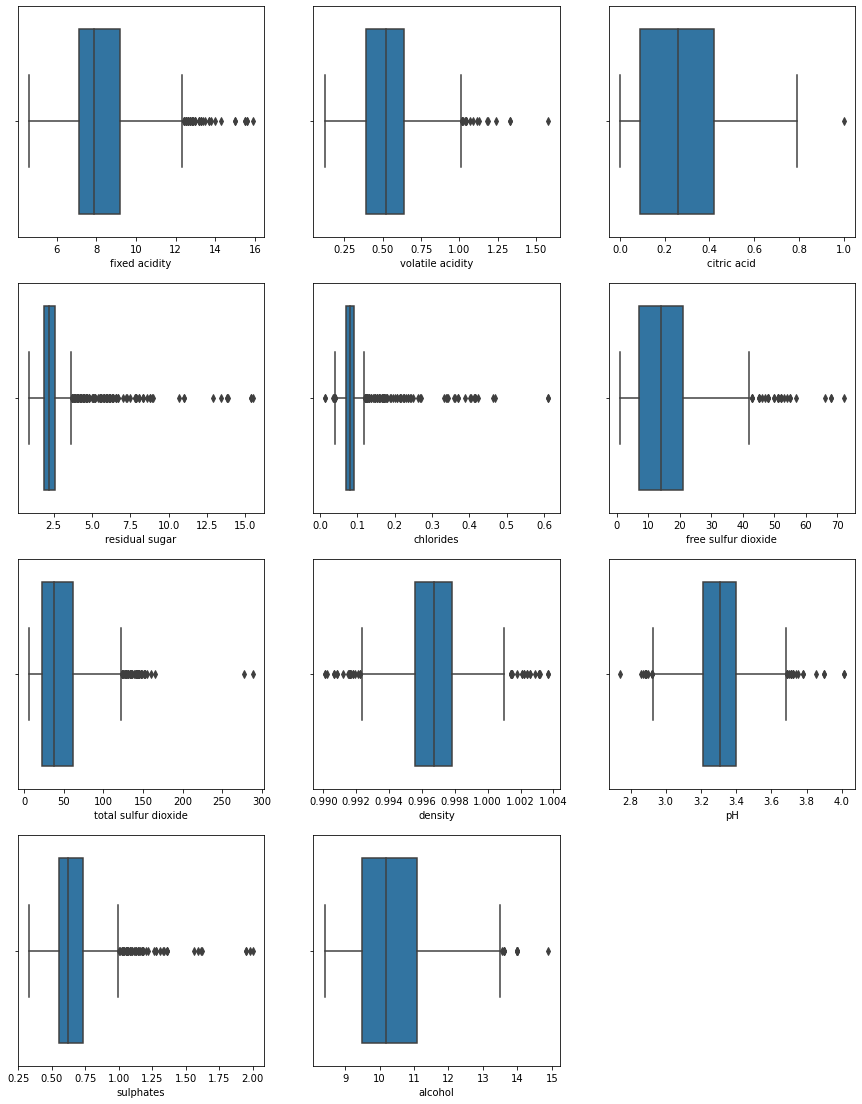

In [569]:
# let's see how data is distributed for every column

plt.figure(figsize=(15,50))

graph=1

for column in X:
    if plotnumber<=30:  
        ax= plt.subplot(10,3,graph)
        sns.boxplot(X[column],orient='v')
        plt.xlabel(column,fontsize=10)
        graph+=1
plt.show()

### Outcome of box plot 


From the above outcome we can see that column['volatile acidity','citric acid','density','pH'] has less outliers,


columns['fixed acidity','residual sugar','chlorides','total sulfur dioxide','sulphates','alcohol'] has more outliers

## Skewness

In [570]:
data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 2.129363
dtype: float64

### Outcome of skewness 

skewness threshold is taken is +/-0.65. columns which are having skewness:

fixed acidity 

volatile acidity

residual sugar

chlorides

free sulfur dioxide

total sulfur dioxide

sulphates

alcohal


## Normal distribution Curve

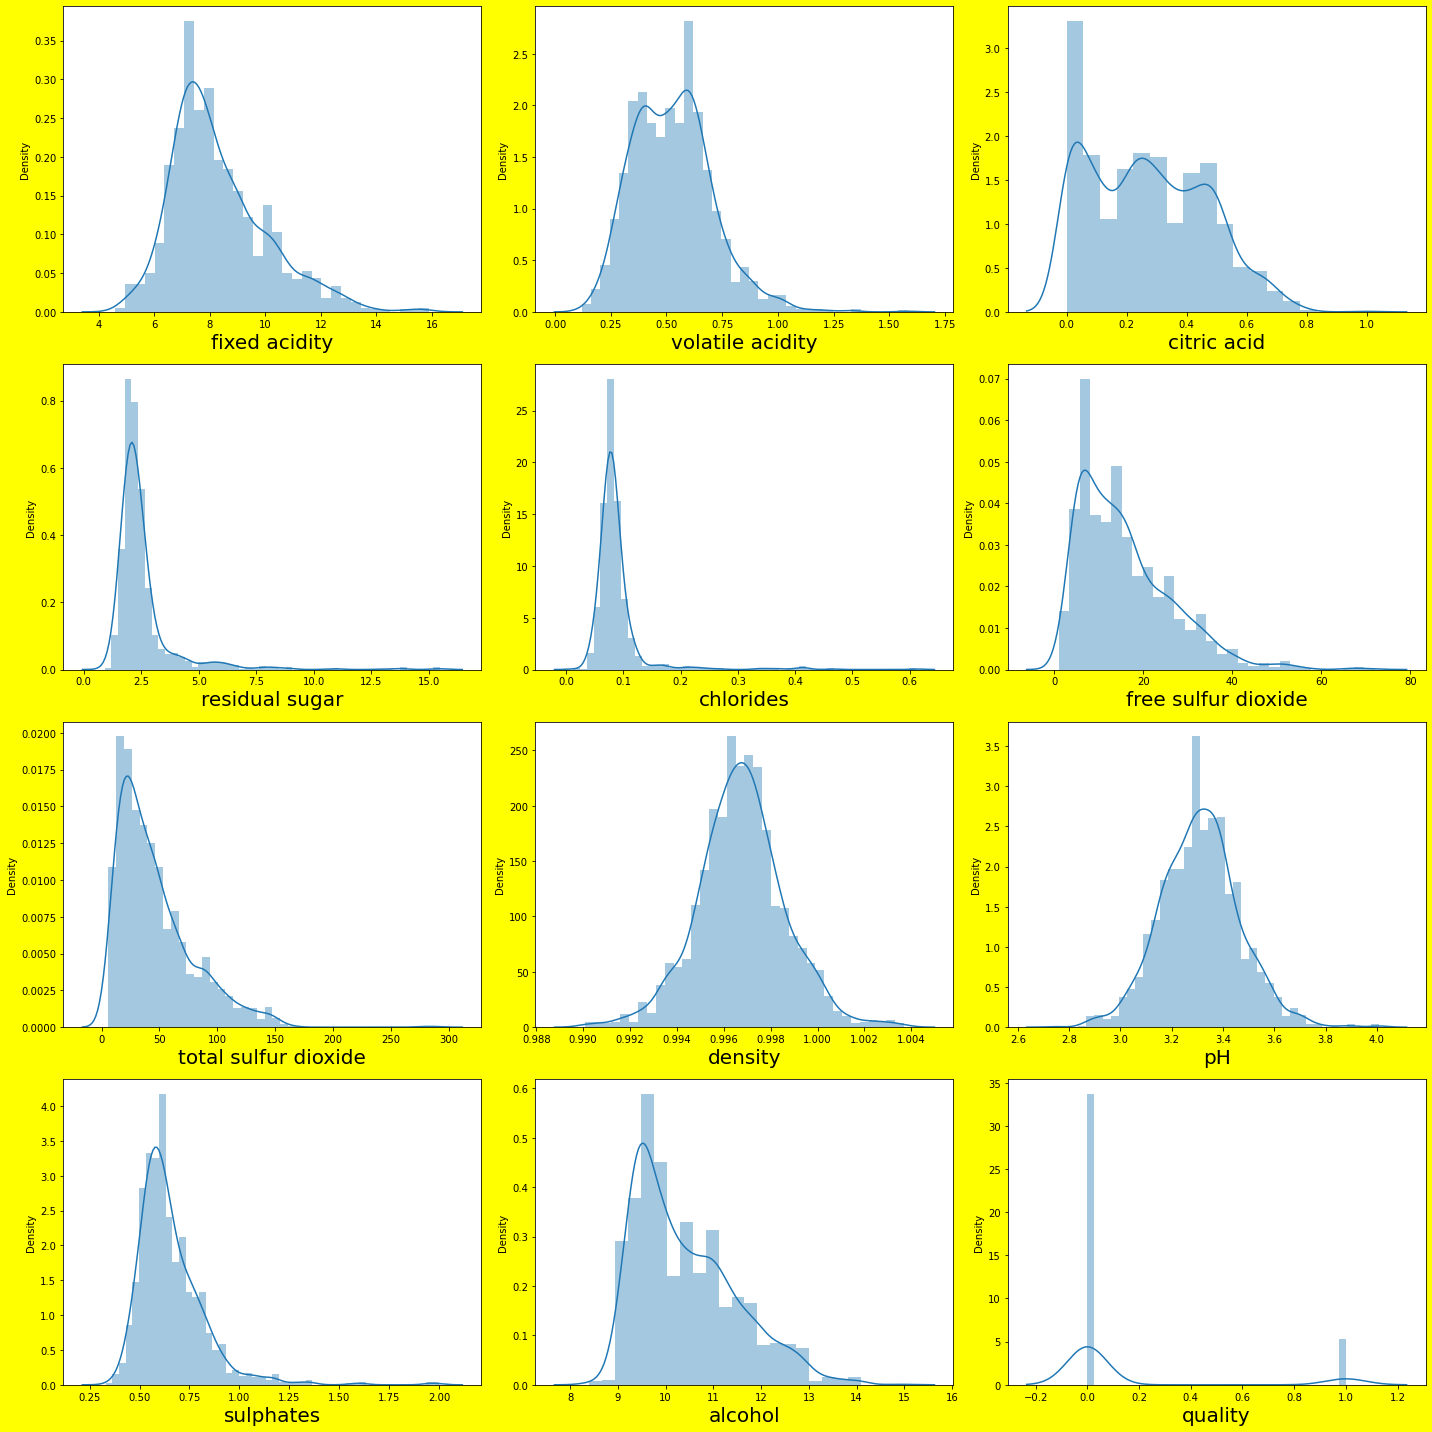

In [571]:
# let's see how data is distributed for every column

plt.figure(figsize=(20,20),facecolor='yellow')
plotnumber=1

for column in data:
    if plotnumber<=12:  #as there are 9 columns in the data 
        ax= plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
        
    plotnumber+=1
plt.tight_layout()

Above distribution shows data is not distrbuted normally. & its shows that the data is skewed

## Data cleaning & removing the outlier 

In [572]:

## stats available in stats

from scipy.stats import zscore 

# supply all the column which is having in outlier 

z_score=zscore(data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
                     'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]) 
abs_z_score =np.abs(z_score) 


filtering_entry =(abs_z_score<3).all(axis=1)

data=data[filtering_entry]

data.reset_index()

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,8.312551,0.524050,0.265281,2.388717,0.081531,15.089849,43.660494,0.996718,3.316152,0.642414,10.417798,0.137860
std,1.647635,0.169451,0.191271,0.865307,0.021218,9.317669,29.414615,0.001718,0.141052,0.129753,1.021649,0.344871
min,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,36.000000,0.996700,3.315000,0.620000,10.200000,0.000000
75%,9.200000,0.635000,0.420000,2.600000,0.089000,21.000000,58.000000,0.997800,3.400000,0.720000,11.100000,0.000000
max,13.500000,1.040000,0.790000,6.700000,0.226000,47.000000,145.000000,1.002200,3.750000,1.160000,13.600000,1.000000


## Percentage data loss

In [573]:
## percentage data loss

loss_percent =(1599-1458)/1599*100
print(loss_percent)

8.818011257035648


In [574]:
data.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
quality                 2.103030
dtype: float64

## Transforming data to remove the skewness

In [575]:
from sklearn.preprocessing import power_transform
X=power_transform(X,method='yeo-johnson')

In [576]:
X

array([[-4.42665887e-01,  9.95541630e-01, -1.53110932e+00, ...,
         1.27568966e+00, -5.81649810e-01, -1.07502541e+00],
       [-1.61307687e-01,  1.77129874e+00, -1.53110932e+00, ...,
        -7.09517441e-01,  3.95139954e-01, -5.00859609e-01],
       [-1.61307687e-01,  1.26980139e+00, -1.25535866e+00, ...,
        -3.10054087e-01,  1.83771552e-01, -5.00859609e-01],
       ...,
       [-1.36436736e+00,  3.87059824e-04, -6.83293826e-01, ...,
         7.18868609e-01,  8.20841495e-01,  7.34557526e-01],
       [-1.76745837e+00,  7.28552768e-01, -7.43826364e-01, ...,
         1.63859531e+00,  5.88343819e-01, -1.87998601e-02],
       [-1.66263981e+00, -1.32045850e+00,  1.03107021e+00, ...,
         5.29831606e-01,  2.56369273e-01,  7.34557526e-01]])

In [577]:
scaler = StandardScaler()

X= scaler.fit_transform(X)

In [578]:
X

array([[-4.42665887e-01,  9.95541630e-01, -1.53110932e+00, ...,
         1.27568966e+00, -5.81649810e-01, -1.07502541e+00],
       [-1.61307687e-01,  1.77129874e+00, -1.53110932e+00, ...,
        -7.09517441e-01,  3.95139954e-01, -5.00859609e-01],
       [-1.61307687e-01,  1.26980139e+00, -1.25535866e+00, ...,
        -3.10054087e-01,  1.83771552e-01, -5.00859609e-01],
       ...,
       [-1.36436736e+00,  3.87059824e-04, -6.83293826e-01, ...,
         7.18868609e-01,  8.20841495e-01,  7.34557526e-01],
       [-1.76745837e+00,  7.28552768e-01, -7.43826364e-01, ...,
         1.63859531e+00,  5.88343819e-01, -1.87998601e-02],
       [-1.66263981e+00, -1.32045850e+00,  1.03107021e+00, ...,
         5.29831606e-01,  2.56369273e-01,  7.34557526e-01]])

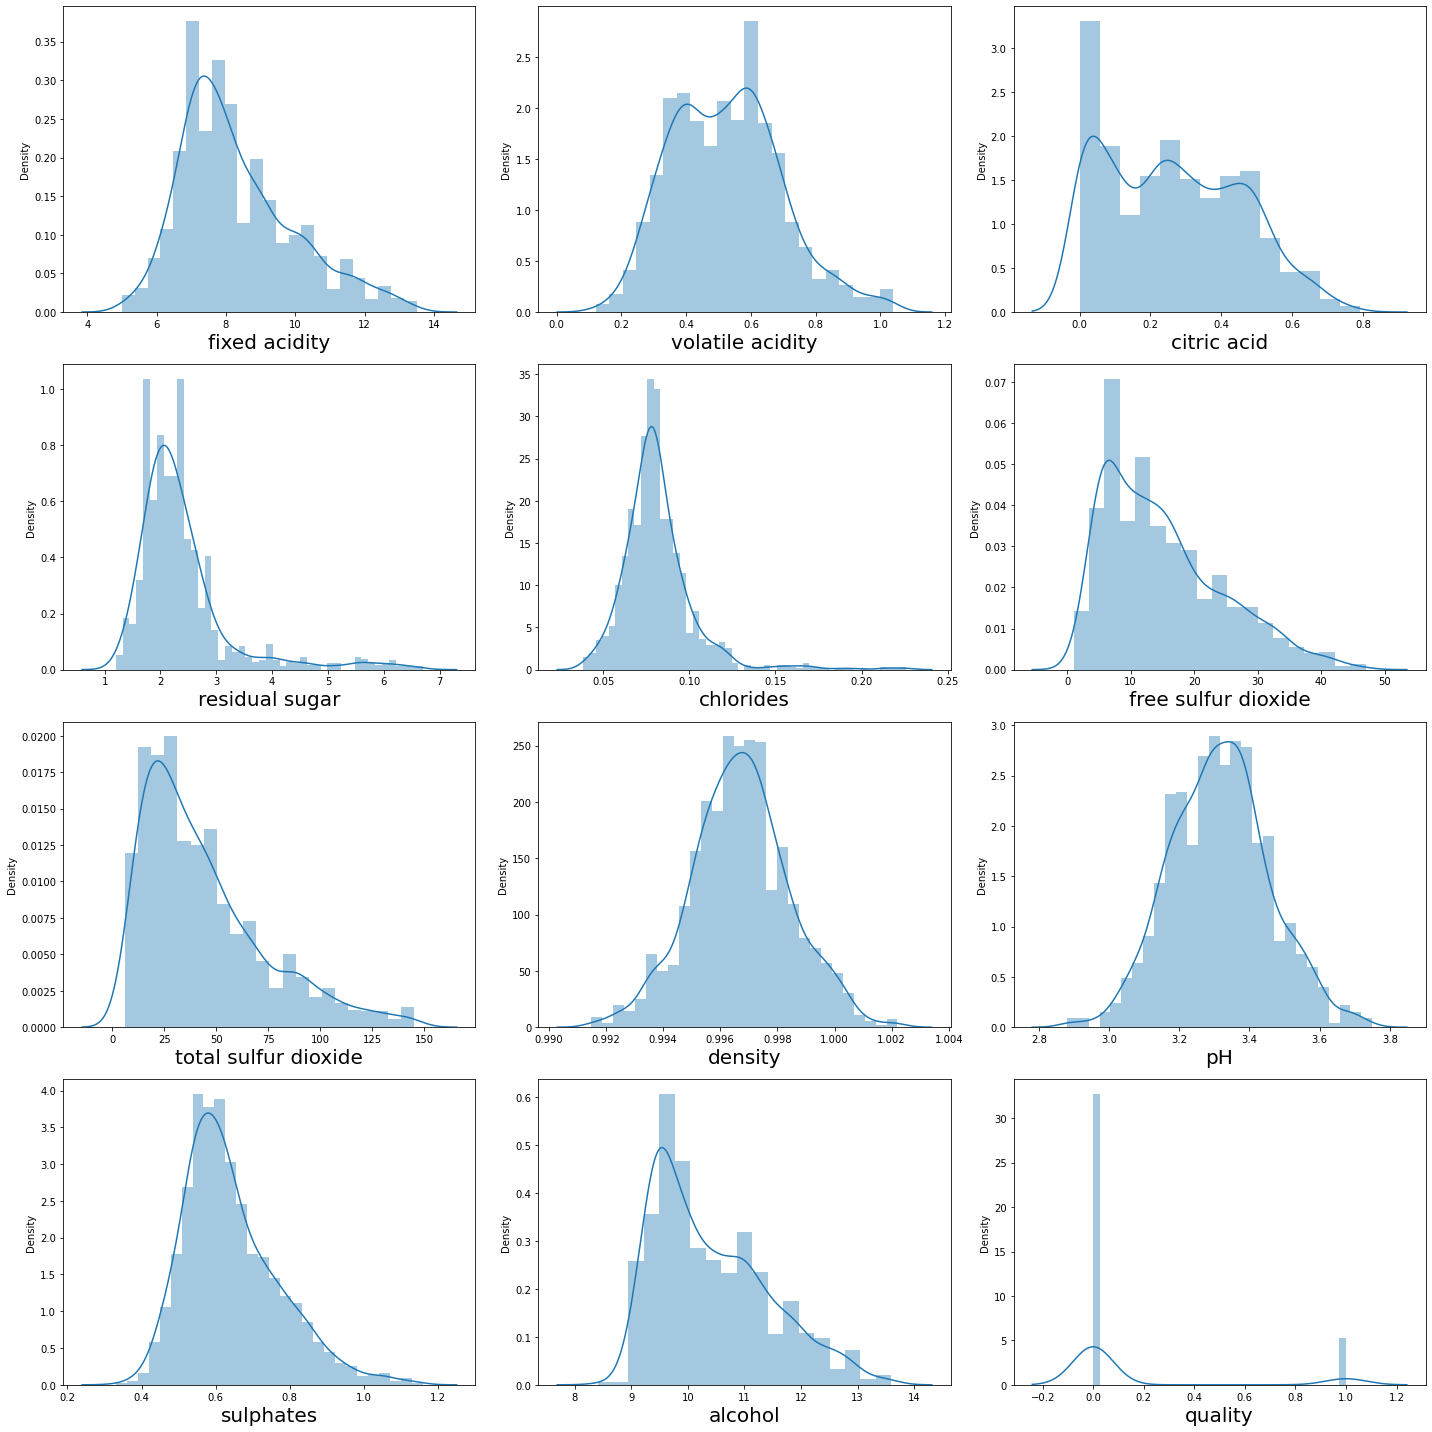

In [579]:
# let's see how data is distributed for every column

plt.figure(figsize=(20,20))
plotnumber=1

for column in data:
    if plotnumber<=12:  #as there are 9 columns in the data 
        ax= plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
        
    plotnumber+=1
plt.tight_layout()

The data looks much better now than before. We will start our analysis with this data now as we don't want to lose important information. If our model doesn't work with accuracy, we will come back for more preprocessing.

In [580]:
# Checking label data set 
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [581]:
# checking Features data set 
X

array([[-4.42665887e-01,  9.95541630e-01, -1.53110932e+00, ...,
         1.27568966e+00, -5.81649810e-01, -1.07502541e+00],
       [-1.61307687e-01,  1.77129874e+00, -1.53110932e+00, ...,
        -7.09517441e-01,  3.95139954e-01, -5.00859609e-01],
       [-1.61307687e-01,  1.26980139e+00, -1.25535866e+00, ...,
        -3.10054087e-01,  1.83771552e-01, -5.00859609e-01],
       ...,
       [-1.36436736e+00,  3.87059824e-04, -6.83293826e-01, ...,
         7.18868609e-01,  8.20841495e-01,  7.34557526e-01],
       [-1.76745837e+00,  7.28552768e-01, -7.43826364e-01, ...,
         1.63859531e+00,  5.88343819e-01, -1.87998601e-02],
       [-1.66263981e+00, -1.32045850e+00,  1.03107021e+00, ...,
         5.29831606e-01,  2.56369273e-01,  7.34557526e-01]])

## Splitting the dataFrame 

In [610]:
# Building model to test unexposed data

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=900)

y_train.head()

398     0
1300    0
456     0
1088    1
182     0
Name: quality, dtype: int64

In [611]:
from sklearn.metrics import plot_roc_curve

# Defining function predict training and testing result 

In [612]:
def print_score(clf,x_train,x_test,y_train,y_test, train=True): # Classifier-?? i dont which classifier pass
    if train:
        y_pred=clf.predict(x_train)
        
        print("\n=============Train Result=========================")
        print(f"Accuracy Score: {accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train == False:
        pred =clf.predict(x_test)
        
        print("\n=============Test Result=========================")
        print(f"Accuracy Score: {accuracy_score(y_test,pred)*100:.2f}%")
        print (confusion_matrix(y_test,pred))
        print ('\n \n  Test Classification Report \n', classification_report(y_test,pred,digits=2))

## Classification Methods

## Model instantiating and training

In [613]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

print_score(dt,x_train,x_test,y_train,y_test, train=True)

print_score (dt,x_train,x_test,y_train,y_test, train=False)


=============Train Result=========================
Accuracy Score: 100.00%

=============Test Result=========================
Accuracy Score: 90.50%
[[334  23]
 [ 15  28]]

 
  Test Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       357
           1       0.55      0.65      0.60        43

    accuracy                           0.91       400
   macro avg       0.75      0.79      0.77       400
weighted avg       0.91      0.91      0.91       400



In [586]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

#Random Forest Model Training and printing train and test score 

rf.fit(x_train,y_train)

print_score(rf,x_train,x_test,y_train,y_test, train=True)

print_score (rf,x_train,x_test,y_train,y_test, train=False)




=============Train Result=========================
Accuracy Score: 100.00%

=============Test Result=========================
Accuracy Score: 91.25%
[[334  12]
 [ 23  31]]

 
  Test Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       346
           1       0.72      0.57      0.64        54

    accuracy                           0.91       400
   macro avg       0.83      0.77      0.79       400
weighted avg       0.91      0.91      0.91       400



In [587]:
from sklearn.svm import SVC
svc=SVC()

#svc Model training and printing train and test score 
svc.fit(x_train,y_train)

print_score(svc,x_train,x_test,y_train,y_test, train=True)

print_score (svc,x_train,x_test,y_train,y_test, train=False)


=============Train Result=========================
Accuracy Score: 90.41%

=============Test Result=========================
Accuracy Score: 88.25%
[[335  11]
 [ 36  18]]

 
  Test Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       346
           1       0.62      0.33      0.43        54

    accuracy                           0.88       400
   macro avg       0.76      0.65      0.68       400
weighted avg       0.86      0.88      0.87       400



In [588]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt=GradientBoostingClassifier()

#GBDT Model Training and printing train and test score 

gbdt.fit(x_train,y_train)

print_score(gbdt,x_train,x_test,y_train,y_test, train=True)

print_score (gbdt,x_train,x_test,y_train,y_test, train=False)


=============Train Result=========================
Accuracy Score: 97.16%

=============Test Result=========================
Accuracy Score: 90.00%
[[329  17]
 [ 23  31]]

 
  Test Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       346
           1       0.65      0.57      0.61        54

    accuracy                           0.90       400
   macro avg       0.79      0.76      0.78       400
weighted avg       0.90      0.90      0.90       400



# Cross validation score to check if the model is overfitting 


In [589]:
pred_rf=rf.predict(x_test)
from sklearn.model_selection import cross_val_score 
rfs=accuracy_score(y_test,pred_rf)
for i in range(2,10):
    rfscore=cross_val_score(rf,X,y,cv=i)
    rfc=rfscore.mean()
    print("At cv:-",i)
    print("cross validation score is:-",rfc*100)
    print("accuracy_score is:-",rfs*100)
    print("\n")

At cv:- 2
cross validation score is:- 86.80303504380475
accuracy_score is:- 91.25


At cv:- 3
cross validation score is:- 87.99249530956847
accuracy_score is:- 91.25


At cv:- 4
cross validation score is:- 87.5560776942356
accuracy_score is:- 91.25


At cv:- 5
cross validation score is:- 86.36696708463948
accuracy_score is:- 91.25


At cv:- 6
cross validation score is:- 86.99135479147307
accuracy_score is:- 91.25


At cv:- 7
cross validation score is:- 87.1808341815237
accuracy_score is:- 91.25


At cv:- 8
cross validation score is:- 88.11840452261306
accuracy_score is:- 91.25


At cv:- 9
cross validation score is:- 87.24405227928365
accuracy_score is:- 91.25




### Since cross validation score,accuracy score are almost same.We are heading with a good approcah 

In [590]:
scr=cross_val_score(dt,X,y,cv=8)
print('Cross valdation score of Decision Tree Model:',scr.mean())

Cross valdation score of Decision Tree Model: 0.8392650753768844


In [591]:
scr=cross_val_score(rf,X,y,cv=8)
print('Cross valdation score of Random Forest Model:',scr.mean())

Cross valdation score of Random Forest Model: 0.8780621859296482


In [592]:
scr=cross_val_score(svc,X,y,cv=8)
print('Cross valdation score of SVC Model:',scr.mean())

Cross valdation score of SVC Model: 0.8774183417085427


In [593]:
scr=cross_val_score(gbdt,X,y,cv=8)
print('Cross valdation score of GBDT Model:',scr.mean())

Cross valdation score of GBDT Model: 0.8668059045226131


RandomForest &  SVC is performing better among all so we will continue with RandomForest & SVC 

# Hyper parameter tuning 

Let's try to increase our accuracy of models (SVC  & Random Forest )

## Grid Search CV

In [594]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [595]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=8)

In [596]:
grid_svc.fit(x_train, y_train)

GridSearchCV(cv=8, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [597]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.8, 'kernel': 'rbf'}

In [598]:
grid_svc.best_estimator_

SVC(C=1.2, gamma=0.8)

In [599]:
svc=SVC(C=1.2, gamma=0.8, kernel='rbf')

#svc Model training and printing train and test score 
svc.fit(x_train,y_train)

print_score(svc,x_train,x_test,y_train,y_test, train=True)

print_score (svc,x_train,x_test,y_train,y_test, train=False)


=============Train Result=========================
Accuracy Score: 99.50%

=============Test Result=========================
Accuracy Score: 91.00%
[[343   3]
 [ 33  21]]

 
  Test Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       346
           1       0.88      0.39      0.54        54

    accuracy                           0.91       400
   macro avg       0.89      0.69      0.74       400
weighted avg       0.91      0.91      0.89       400



SVC improves from 87.7% to 91.0% using Grid Search CV

In [600]:
#Finding best parameters for our SVC model
param = {'criterion':['gini', 'entropy'],
    'max_depth': range(4,10),
    'max_features':['auto','sqrt','log2']  
}
grid_rf = GridSearchCV(rf, param_grid=param, scoring='accuracy', cv=8)

In [601]:
grid_rf.fit(x_train, y_train)

GridSearchCV(cv=8, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 10),
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='accuracy')

In [602]:
#Best parameters for our svc model
grid_rf.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto'}

In [603]:
rf=RandomForestClassifier(criterion= 'entropy', max_depth=9, max_features='log2')

#svc Model training and printing train and test score 
rf.fit(x_train,y_train)

print_score(rf,x_train,x_test,y_train,y_test, train=True)

print_score (rf,x_train,x_test,y_train,y_test, train=False)


=============Train Result=========================
Accuracy Score: 99.17%

=============Test Result=========================
Accuracy Score: 90.25%
[[332  14]
 [ 25  29]]

 
  Test Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       346
           1       0.67      0.54      0.60        54

    accuracy                           0.90       400
   macro avg       0.80      0.75      0.77       400
weighted avg       0.90      0.90      0.90       400



rf improves from 87.7% to 90.25% using Grid Search CV

## we select SVC is over final model 

##  ROC AUC curve 


Since it is difficult to evalute the score based on only TPR and FPR data, there comes AUC

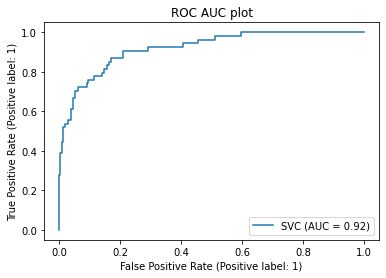

In [604]:
plot_roc_curve(grid_svc.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

Since the model without outlier performing well !! We will select that dataframe.

## Model Saving:

In [606]:
import joblib
joblib.dump(grid_svc.best_estimator_,"WineModel.pkl")

['WineModel.pkl']

## Conclusion

SVC model is the  Best model for Wine dataset predection 

In [607]:
import numpy as np
a=np.array(y_test)
predicted =np.array(svc.predict(x_test))
df_com=pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))
df_com

,original,predicted
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
395,0,0
396,0,1
397,0,0
398,0,0


since model giving the some error